In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Note: for  this to work, you should have all the csv files with the same names inside the same directory as this notebook
files = ['./data1_H9.csv','./data2_H2.csv','./data3_H7.csv','./data4_H6.csv','./data5_H8.csv','./data6_H8.csv','./data7_H4.csv','./data8_H5.csv','./data9_H2.csv','./data10_H2.csv','./data11_H1.csv','./data12_H2.csv','./data13_H1.csv','./data14_H1.csv', './data15_H1.csv', './data16_H1.csv', './data17_H1.csv', './data18_H1.csv']

all_response_times = {}

for i in range(len(files)):
    df = pd.read_csv(files[i])

    # Filter out rows where response time is 4000 and the experiment stage to find out the most confusing food is running 
    filtered_df = df[(df['stim_duration'] != 4000) & (df['exp_stage'] == 'decision')]

    # Group the data by food item and collect response times
    for food, group in filtered_df.groupby('stim'):
        if food not in all_response_times:
            all_response_times[food] = []
        all_response_times[food].extend(group['stim_duration'].tolist())

mean_response_times = {food: sum(times) / len(times) for food, times in all_response_times.items()}
sorted_food_items = sorted(mean_response_times.items(), key=lambda x: x[1], reverse=True)
top_10_food_items = sorted_food_items[:10]
food_names = [item[0] for item in top_10_food_items]
mean_times = [item[1] for item in top_10_food_items]


C:\Users\gaura\AppData\Local\Temp\ipykernel_8888\1330117024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


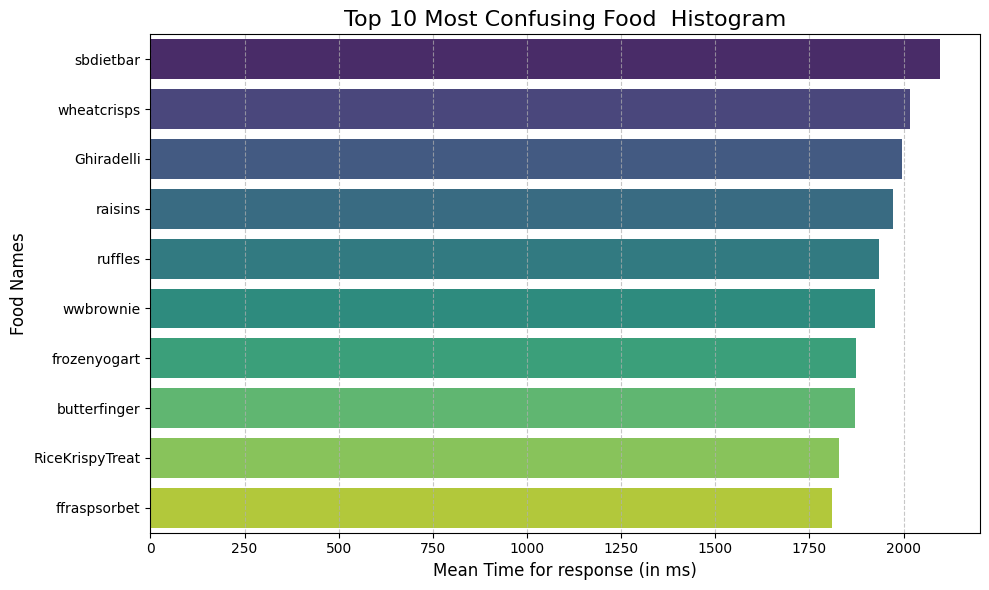

Food items with the longest mean response time: ['sbdietbar']
Longest mean response time: 2098.0


In [5]:
data = pd.DataFrame({"Food": food_names, "Frequency": mean_times})

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data,
    y="Food",
    x="Frequency",
    palette="viridis"
)

# Add labels and title
plt.title("Top 10 Most Confusing Food  Histogram", fontsize=16)
plt.xlabel("Mean Time for response (in ms)", fontsize=12)
plt.ylabel("Food Names", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Find the food item(s) with the longest mean response time
max_mean_time = max(mean_response_times.values())
longest_mean_foods = [food for food, mean_time in mean_response_times.items() if mean_time == max_mean_time]

# Output the results
#print(all_response_times)
print("Food items with the longest mean response time:", longest_mean_foods)
print("Longest mean response time:", max_mean_time)